In [22]:
from datasets import load_from_disk

# Specify the path to the dataset
dataset_path = '/home/sjoshi/lmm/lmm_synthetic/data/generated/v3_spatial_grid_multimodal'

# Load the dataset
dataset = load_from_disk(dataset_path)

# Display the dataset
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
})


In [24]:
dataset["train"][0]

{'text': "| deer | cat | bird |\n| deer | cat | cat |\n| bird | dog | bird |\nThe grid above is size 3 by 3. Each cell contains an object from ['deer', 'bird', 'dog', 'cat'].\nWhat object is in row 2, column 2? A: bird\nWhat object is in row 1, column 2? A: cat\nWhat object is in row 0, column 0? A: deer\nWhat object is in row 0, column 1? A: cat\nWhat object is in row 1, column 0? A: deer\nWhat object is in row 1, column 1? A: cat\nWhat object is in row 0, column 2? A: bird\nWhat object is in row 2, column 1? A: dog\nWhat object is in row 2, column 0? A: bird",
 'prompt': "The grid above is size 3 by 3. Each cell contains an object from ['deer', 'bird', 'dog', 'cat'].",
 'conversations': [['What object is in row 2, column 2?', 'A: bird'],
  ['What object is in row 1, column 2?', 'A: cat'],
  ['What object is in row 0, column 0?', 'A: deer'],
  ['What object is in row 0, column 1?', 'A: cat'],
  ['What object is in row 1, column 0?', 'A: deer'],
  ['What object is in row 1, column 1?',

In [12]:
from datasets import DatasetDict

# Update paths in the dataset and save to disk
def update_image_paths(dataset, old_path, new_path, save_path):
    """
    Updates all "image" paths in the dataset by replacing old_path with new_path.
    
    Args:
        dataset: A DatasetDict containing splits like "train", "validation", "test".
        old_path: The substring in the current paths to be replaced.
        new_path: The new substring to replace old_path.
        save_path: Path to save the updated dataset.
    """
    # Loop through all splits in the dataset
    for split in dataset.keys():
        # Map the "image" column to replace the old_path with the new_path
        dataset[split] = dataset[split].map(
            lambda example: {"image": example["image"].replace(old_path, new_path)}
        )
    
    # Save the updated dataset to disk
    dataset.save_to_disk(save_path)

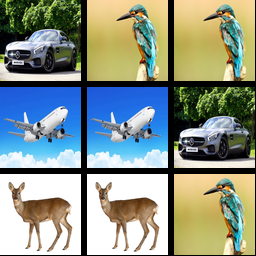

The grid above is size 3 by 3. Each cell contains an object from ['automobile', 'airplane', 'deer', 'bird'].
What object is in row 1, column 0?
A: airplane
What object is in row 0, column 0?
A: automobile
What object is in row 0, column 2?
A: bird
What object is in row 1, column 1?
A: airplane
What object is in row 2, column 1?
A: deer
What object is in row 0, column 1?
A: bird
What object is in row 1, column 2?
A: automobile
What object is in row 2, column 0?
A: deer
What object is in row 2, column 2?
A: bird


In [25]:
import random 
from PIL import Image 

randint = random.randint(0, 1000)
display(Image.open(dataset['train'][randint]["image"]))
print(dataset['train'][randint]["prompt"])
for conv in dataset["train"][randint]["conversations"]:
    print(conv[0])
    print(conv[1])